In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
import imageio
sys.path.append("../pypom")
import camera
import utils
import genpom

Extrinsics kept in 'cm'.
Rectangle(xmin=346, ymin=88, xmax=370,ymax=200, visible=None)


[-100, 740, 460, -100]

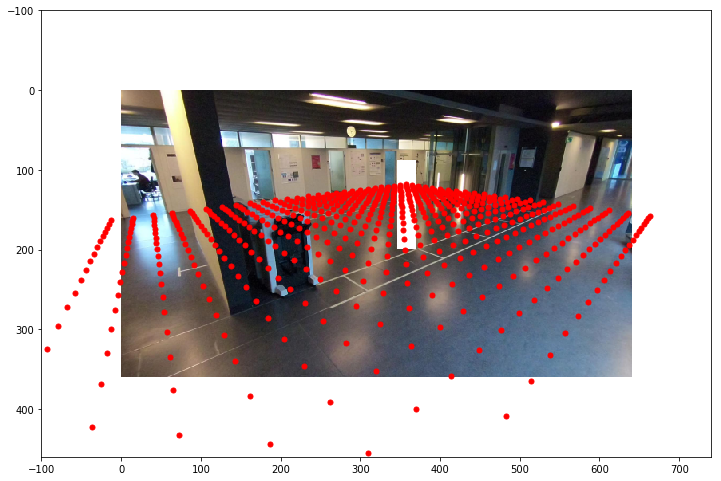

In [20]:
view_shape = (1080//3, 1920//3)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

Rectangle(xmin=348, ymin=92, xmax=367,ymax=198, visible=None)


[-100, 740, 460, -100]

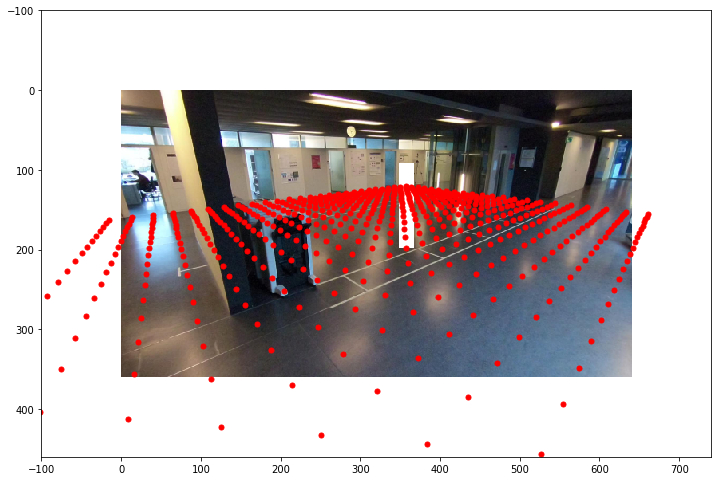

In [21]:
view_shape = (1080//3, 1920//3)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraHbotHeight.from_json("homographies_bottom_head_height.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

Rectangle(xmin=-2119, ymin=82, xmax=367,ymax=198, visible=None)


[-100, 740, 460, -100]

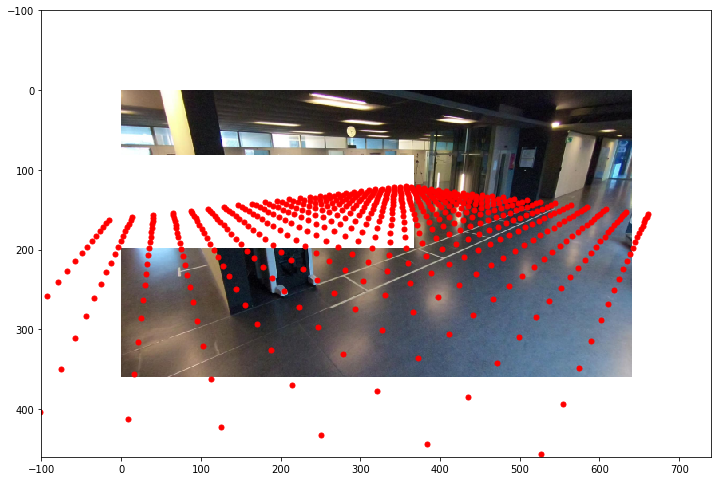

In [22]:
view_shape = (1080//3, 1920//3)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraHbotHtop.from_json("homographies_bottom_top.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

In [23]:
cam0.project_bottom_points(cilinder.bottom_points())

array([[195.94231451, 350.81916017],
       [196.76472422, 349.07145874],
       [197.77528452, 348.15382388],
       [198.88214153, 348.17564086],
       [199.97902398, 349.16133157],
       [200.95465011, 351.03797016],
       [201.70494034, 353.63298725],
       [202.14650945, 356.68615664],
       [202.22886052, 359.87716441],
       [201.94236411, 362.86556892],
       [201.31986449, 365.33566784],
       [200.43144665, 367.03682536],
       [199.37380425, 367.81128124],
       [198.25691639, 367.60562502],
       [197.1909078 , 366.46690558],
       [196.27518079, 364.52771816],
       [195.59071402, 361.98565864],
       [195.19537843, 359.08160041],
       [195.12153092, 356.07932908],
       [195.37504525, 353.24713131],
       [195.93519991, 350.84058297],
       [198.56596521, 357.91200981]])

In [30]:
cam0.project_top_points(cilinder.top_points())

array([[   83.68821868, -1930.43177644],
       [   83.16279211, -1795.35209397],
       [   82.63077846, -1658.02312364],
       [   82.15257643, -1534.12655097],
       [   81.76411327, -1433.05688097],
       [   81.48190771, -1359.19405292],
       [   81.31050977, -1313.80984215],
       [   81.24862023, -1296.64677489],
       [   81.29290331, -1306.90792586],
       [   81.4396958 , -1343.70571489],
       [   81.68498857, -1406.06470886],
       [   82.02283334, -1492.51670643],
       [   82.44209698, -1600.26648335],
       [   82.92156406, -1723.92522205],
       [   83.4242013 , -1854.01675864],
       [   83.89335098, -1975.96610708],
       [   84.25615035, -2070.93979767],
       [   84.43947577, -2119.92463008],
       [   84.39656351, -2110.60222152],
       [   84.13000155, -2043.34802619],
       [   83.69324799, -1931.72148519],
       [   82.53303291, -1628.04379469]])

In [31]:
cilinder.top_points()

array([[-340.        , -296.        ,  180.        ],
       [-340.78230848, -291.05815168,  180.        ],
       [-343.0527331 , -286.59955959,  180.        ],
       [-346.58925231, -283.06022303,  180.        ],
       [-351.04603499, -280.78624863,  180.        ],
       [-355.98725877, -280.00000507,  180.        ],
       [-360.9297285 , -280.77837798,  180.        ],
       [-365.39012718, -283.04525139,  180.        ],
       [-368.93227884, -286.57895101,  180.        ],
       [-371.20980157, -291.03392145,  180.        ],
       [-371.99997971, -295.97451755,  180.        ],
       [-371.22554287, -300.91760555,  180.        ],
       [-368.96222211, -305.37980799,  180.        ],
       [-365.43134432, -308.9247725 ,  180.        ],
       [-360.97818895, -311.20584213,  180.        ],
       [-356.03822365, -311.99995434,  180.        ],
       [-351.09452051, -311.22945406,  180.        ],
       [-346.63051715, -308.9696874 ,  180.        ],
       [-343.08274203, -305.

In [26]:
image_points_top = cam0.project_top_points(cilinder.top_points())
image_points_bot = cam0.project_bottom_points(cilinder.bottom_points())
image_points = np.vstack([image_points_bot, image_points_top])

x_proj_min = image_points[:,1].min() # (pixels)       
x_proj_max = image_points[:,1].max() # (pixels) 

c_proj_bot = image_points_bot[-1,0] # projected bottom central point (pixels)
c_proj_top = image_points_top[-1,0] # projected top central point (pixels)

# (ymin, xmin) is the top-left corner of the rectangle in the image
# (ymax, xmax) is instead the bottom-right corner of the rectangle in the image
ymin = c_proj_top 
xmin = x_proj_min
ymax = c_proj_bot
xmax = x_proj_max 

In [29]:
image_points

array([[  195.94231451,   350.81916017],
       [  196.76472422,   349.07145874],
       [  197.77528452,   348.15382388],
       [  198.88214153,   348.17564086],
       [  199.97902398,   349.16133157],
       [  200.95465011,   351.03797016],
       [  201.70494034,   353.63298725],
       [  202.14650945,   356.68615664],
       [  202.22886052,   359.87716441],
       [  201.94236411,   362.86556892],
       [  201.31986449,   365.33566784],
       [  200.43144665,   367.03682536],
       [  199.37380425,   367.81128124],
       [  198.25691639,   367.60562502],
       [  197.1909078 ,   366.46690558],
       [  196.27518079,   364.52771816],
       [  195.59071402,   361.98565864],
       [  195.19537843,   359.08160041],
       [  195.12153092,   356.07932908],
       [  195.37504525,   353.24713131],
       [  195.93519991,   350.84058297],
       [  198.56596521,   357.91200981],
       [   83.68821868, -1930.43177644],
       [   83.16279211, -1795.35209397],
       [   82.63